# Line Coding - Data vs Signal

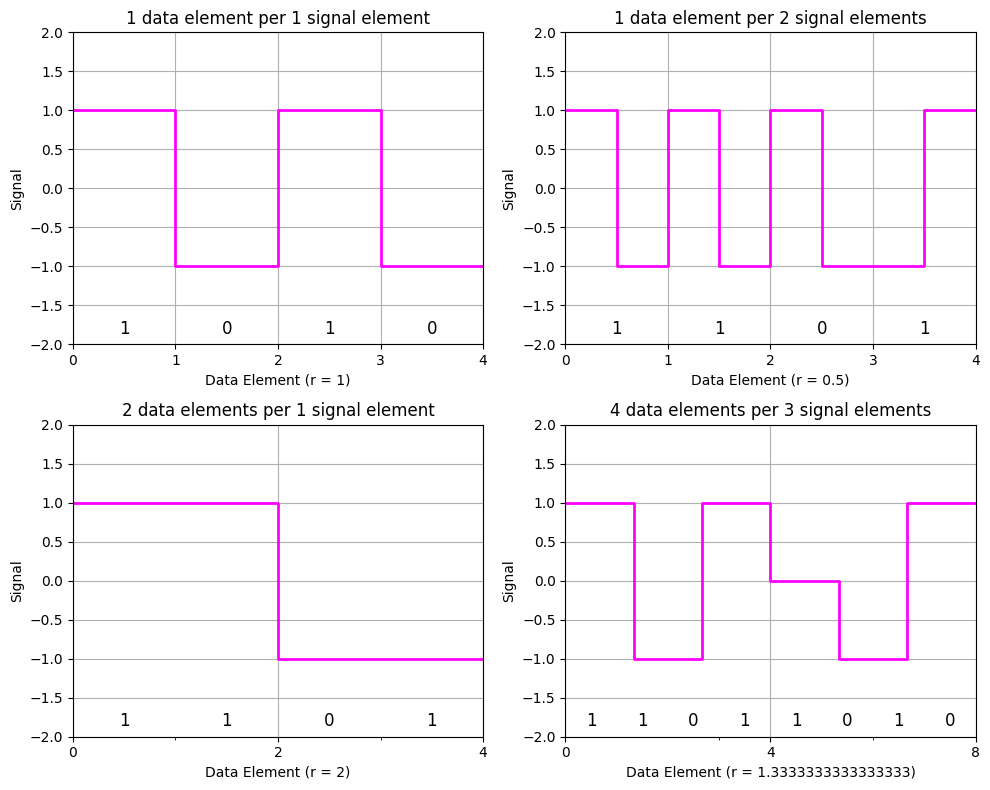

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_signal_vs_data(data, signal, title, ax, r_value, div_data, div_signal):
    t = np.linspace(0, len(data), len(signal) + 1)
    signal = np.append(signal, signal[-1])
    ax.step(t, signal, where='post', color='magenta', linewidth=2)

    ax.set_ylim([-2, 2])
    ax.set_title(title)
    ax.set_ylabel('Signal')
    ax.set_xlabel(f'Data Element (r = {r_value})')
    ax.grid(True)


    ax.set_xlim([0, len(data)])
    ax.set_xticks(np.arange(0, len(data) + 1, div_data))
    ax.set_xticks(np.arange(0, len(data) + 1, div_signal), minor=True)


    for i, bit in enumerate(data):
        ax.text(i + 0.5, -1.8, str(bit), ha='center', va='center', fontsize=12, color='black')


data_a = [1, 0, 1, 0]
signal_a = [1, -1, 1, -1]

data_b = [1, 1, 0, 1]
signal_b = [1, -1, 1, -1, 1, -1, -1, 1]

data_c = [1, 1, 0, 1]
signal_c = [1, -1]

data_d = [1, 1, 0, 1, 1, 0, 1, 0]
signal_d = [1, -1, 1, 0, -1, 1]

plot_signal_vs_data(data_a, signal_a, '1 data element per 1 signal element', axs[0, 0], r_value=1, div_data=1, div_signal=1)
plot_signal_vs_data(data_b, signal_b, '1 data element per 2 signal elements', axs[0, 1], r_value=1/2, div_data=1, div_signal=2)
plot_signal_vs_data(data_c, signal_c, '2 data elements per 1 signal element', axs[1, 0], r_value=2, div_data=2, div_signal=1)
plot_signal_vs_data(data_d, signal_d, '4 data elements per 3 signal elements', axs[1, 1], r_value=4/3, div_data=4, div_signal=3)

plt.tight_layout()
plt.show()


Data Rate

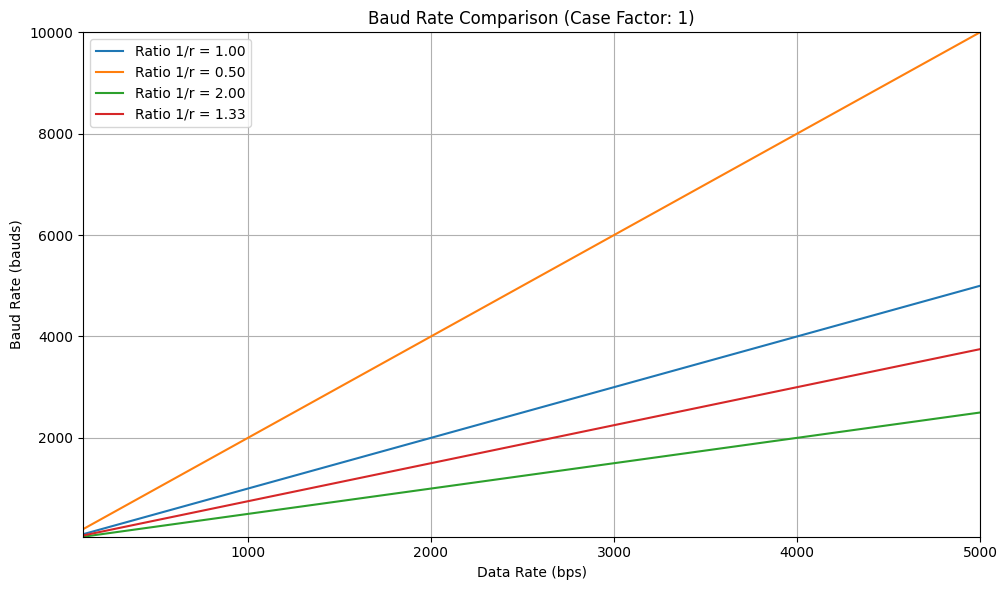

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def compute_baud_rate(data_rate, ratio, case_factor):
    return case_factor * data_rate * (1 / ratio)

def baud_rate_function(data_rate_range, ratio, case_factor):
    return [compute_baud_rate(data_rate, ratio, case_factor) for data_rate in data_rate_range]

data_rate_range = np.linspace(100, 5000, 100)
ratios = np.array([1, 1/2, 2, 4/3])
case_factor = 1

plt.figure(figsize=(10, 6))

for ratio in ratios:
    baud_rates = baud_rate_function(data_rate_range, ratio, case_factor)
    plt.plot(data_rate_range, baud_rates, label=f'Ratio 1/r = {ratio:.2f}')

plt.title(f'Baud Rate Comparison (Case Factor: {case_factor})')
plt.xlabel('Data Rate (bps)')
plt.ylabel('Baud Rate (bauds)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.margins(0)
plt.show()


#Line encoding Self Synchronization

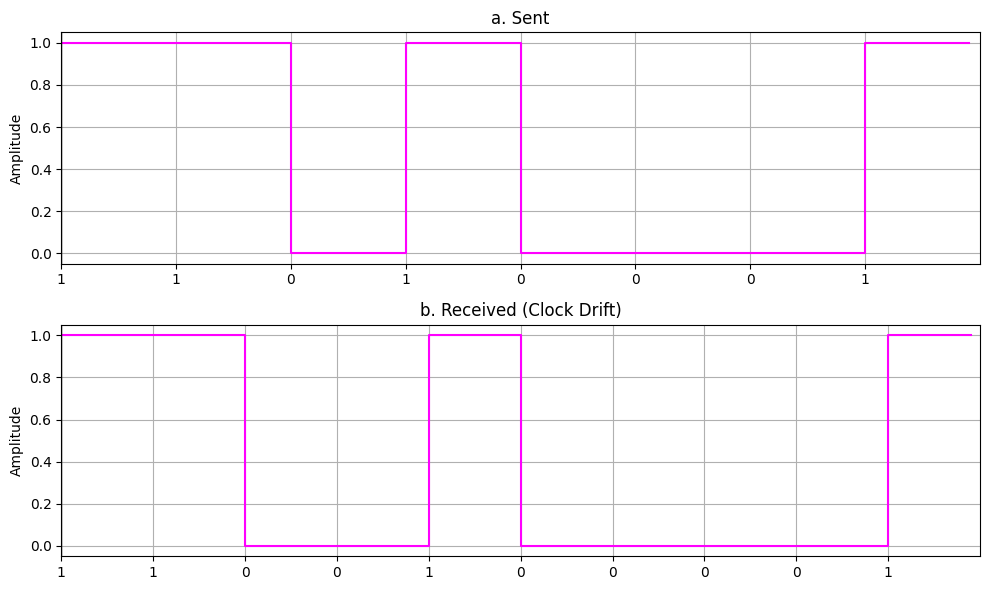

Original Data Bits     : [1 1 0 1 0 0 0 1]
Fast Clock Interpretation : [1, 1, 0, 0, 1, 0, 0, 0, 0, 1]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def sender_generate_signal(data_bits, samples_per_bit):
    signal = []
    for bit in data_bits:
        signal.extend([bit] * samples_per_bit)
    return np.array(signal)

def receiver_interpret_signal(signal, samples_per_bit, clock_drift=0):
    receiver_samples = samples_per_bit + clock_drift
    interpreted_bits = []
    for i in range(0, len(signal), receiver_samples):
        bit = 1 if np.mean(signal[i:i + receiver_samples]) > 0.5 else 0
        interpreted_bits.append(bit)
    return interpreted_bits

data_bits = np.array([1, 1, 0, 1, 0, 0, 0, 1])
samples_per_bit = 10
clock_drift_faster = -2

signal = sender_generate_signal(data_bits, samples_per_bit)
interpreted_bits_fast = receiver_interpret_signal(signal, samples_per_bit, clock_drift_faster)

received_signal = sender_generate_signal(interpreted_bits_fast, samples_per_bit)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.step(np.arange(len(signal)), signal, where='post', color='magenta')
plt.title('a. Sent')
plt.ylabel('Amplitude')
plt.xlim(0, len(signal))
plt.xticks(np.arange(0, len(signal), samples_per_bit), data_bits)
plt.grid(True)
plt.axvline(0, color='black', linewidth=1)

plt.subplot(2, 1, 2)
plt.step(np.arange(len(received_signal)), received_signal, where='post', color='magenta')
plt.title('b. Received (Clock Drift)')
plt.ylabel('Amplitude')
plt.xlim(0, len(received_signal))
plt.xticks(np.arange(0, len(received_signal), samples_per_bit), interpreted_bits_fast)
plt.grid(True)
plt.axvline(0, color='black', linewidth=1)

plt.tight_layout()
plt.show()

print(f"Original Data Bits     : {data_bits}")
print(f"Fast Clock Interpretation : {interpreted_bits_fast}")


# Bandwidth with Data Signal


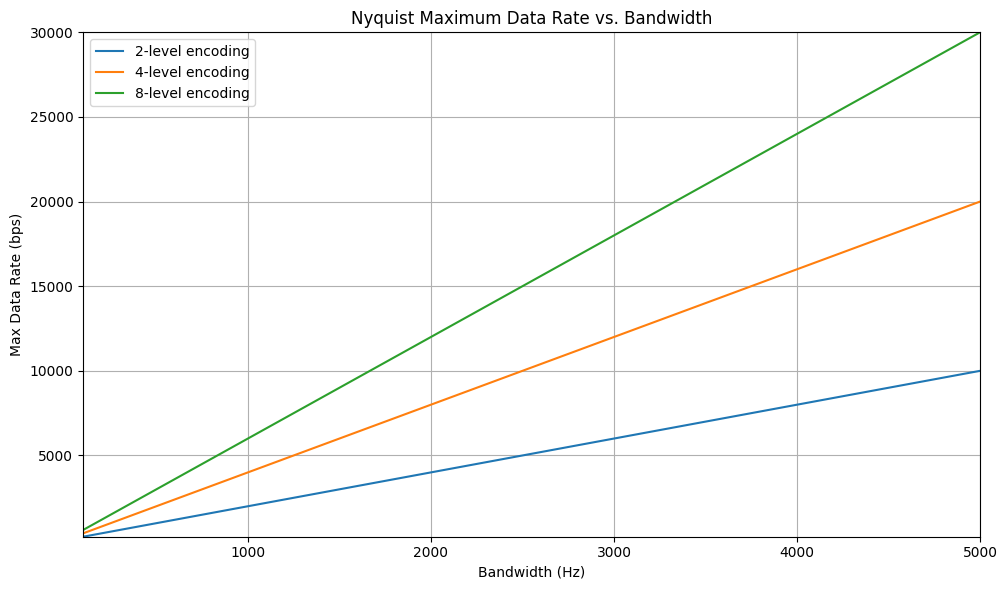

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Nyquist maximum data rate formula
def nyquist_max_data_rate(bandwidth, levels):
    return 2 * bandwidth * np.log2(levels)

# Bandwidth range (in Hz)
bandwidths = np.linspace(100, 5000, 100)

# Different levels of signal encoding (L)
levels = [2, 4, 8]

plt.figure(figsize=(10, 6))
for L in levels:
    data_rates = nyquist_max_data_rate(bandwidths, L)
    plt.plot(bandwidths, data_rates, label=f'{L}-level encoding')

plt.title('Nyquist Maximum Data Rate vs. Bandwidth')
plt.xlabel('Bandwidth (Hz)')
plt.ylabel('Max Data Rate (bps)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.margins(0)
plt.show()
